In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",)

Mounted at /content/gdrive


In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

In [ ]:
!pip install https://github.com/stefanloock/pyshearlab/archive/master.zip

     - 99 kB 1.2 MB/s
  Created wheel for pyshearlab: filename=pyshearlab-0.0.1-py3-none-any.whl size=36608 sha256=2a4df0bc126213b8691092d305d1a0d214696ea24fa3f12b12b6ea032054b3a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-udf032rk/wheels/2a/6a/5d/40af9c209761ba2d810b44d4b820323097a786d45e50eb60b3
Successfully built pyshearlab


In [ ]:
import pyshearlab

In [ ]:

def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/training')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/Colab Notebooks/training
/content/gdrive/My Drive/Colab Notebooks/training


In [ ]:
from google.colab.patches import cv2_imshow

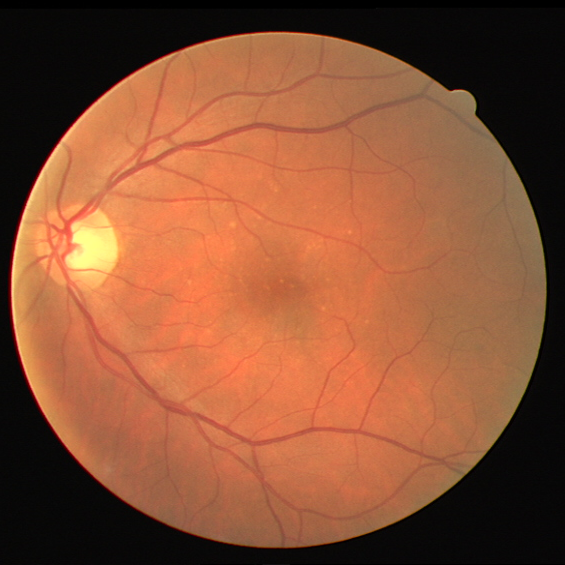

Elapsed time is 0.26245737075805664 seconds.


In [ ]:

tic()
img = cv.imread("21_training.tif")
img_mask = cv.imread("21_training_mask.tiff")

sq_dim = min(img.shape[0], img.shape[1])

img_resize = cv.resize(img, (sq_dim, sq_dim))
img_mask_resize = cv.resize(img_mask, (sq_dim, sq_dim))

cv2_imshow(img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

toc()

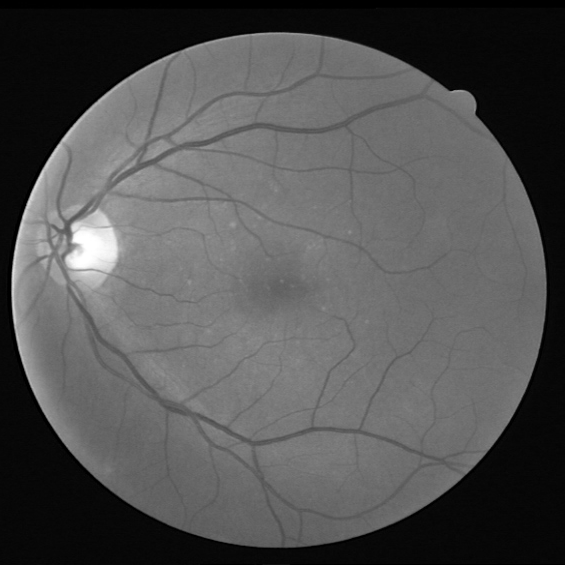

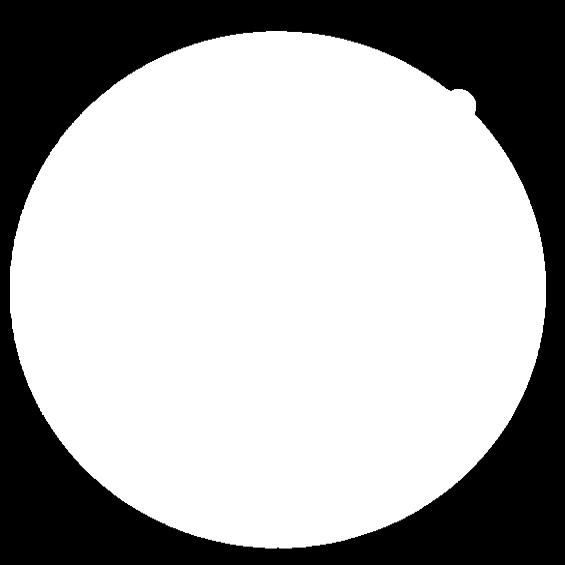

Elapsed time is 0.08736205101013184 seconds.


In [ ]:
tic()

gr = img_resize[:,:,1]
mask = img_mask_resize[:,:,1]

cv2_imshow(gr)
cv.waitKey(0)
cv.destroyAllWindows()

cv2_imshow(mask)
cv.waitKey(0)
cv.destroyAllWindows()

toc()

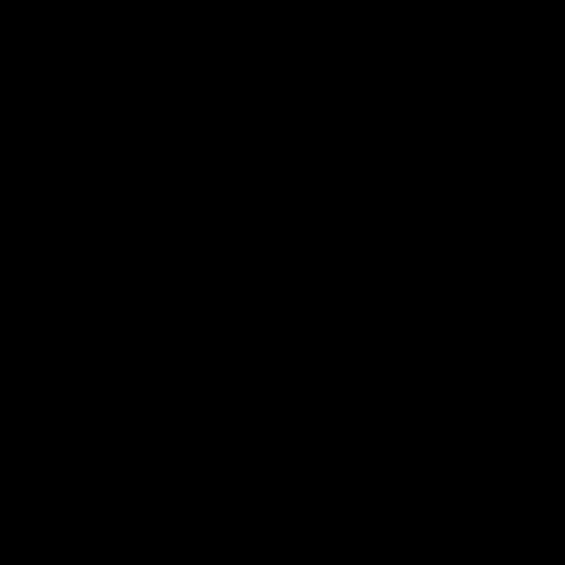

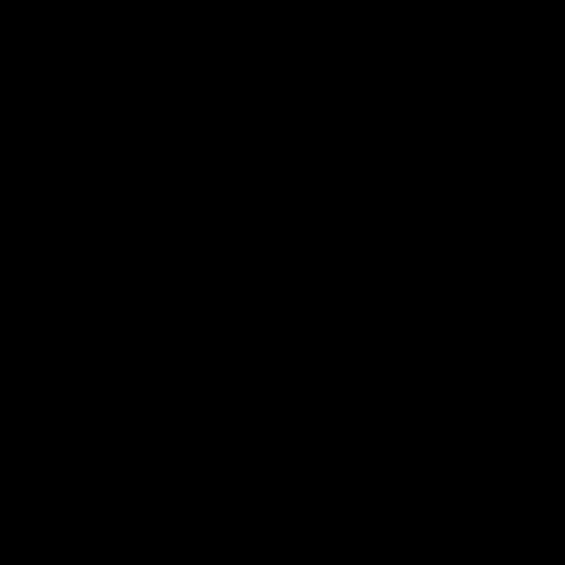

Elapsed time is 0.8391640186309814 seconds.


In [ ]:
tic()

w = 10
q = 4
ys = 510
yf = 70
xs = 510
xf = 70

gr_n = gr/256
mask_n = mask/256
mask_black = (mask_n<0.9)
mask_tr = mask_n*~mask_black
gr_tr = gr_n*~mask_black
mask_tr[mask_tr>0.9]=1

gr_e = gr_tr
mask_e = mask_tr

cv2_imshow(gr_e)
cv.waitKey(0)
cv.destroyAllWindows()

for x in range(sq_dim-1-q-w):
    for y in range(int((sq_dim-1-q-w)/2)):
        s = mask_e[y,x]+mask_e[y,x+1]+mask_e[y+1,x]+mask_e[y+1,x+1]
        if 0<s<4 and y<=yf:
            for k in range(w):
                gr_e[y+q-w+k+1,x] = gr_tr[y+q+w-k,x]
                mask_e[y+q-w+k+1,x] = 1
        if 0<s<4 and y>ys:
            for k in range(w):
                gr_e[y-q+k,x] = gr_tr[y-q-k-1,x]
                mask_e[y-q+k,x] = 1
    for y in range(int((sq_dim-1-q-w)/2)):
        s = mask_e[-y,x]+mask_e[-y,x+1]+mask_e[-y-1,x]+mask_e[-y-1,x+1]
        if 0<s<4 and y<=yf:
            for k in range(w):
                gr_e[-(y+q-w+k+1),x] = gr_tr[-(y+q+w-k),x]
                mask_e[-(y+q-w+k+1),x] = 1
        if 0<s<4 and y>ys:
            for k in range(w):
                gr_e[-(y-q+k),x] = gr_tr[-(y-q-k-1),x]
                mask_e[-(y-q+k),x] = 1

cv2_imshow(gr_e)
cv.waitKey(0)
cv.destroyAllWindows()

toc()

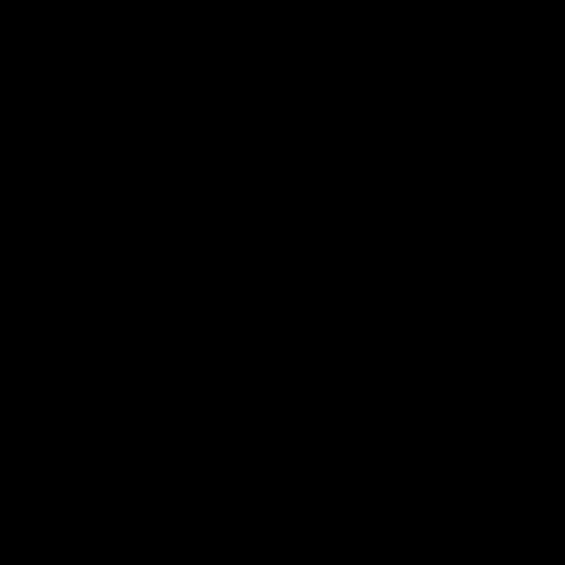

Elapsed time is 0.8302226066589355 seconds.


In [ ]:
tic()

for y in range(sq_dim-1-q-w):
    for x in range(int((sq_dim-1-q-w)/2)):
        s = mask_e[y,x]+mask_e[y,x+1]+mask_e[y+1,x]+mask_e[y+1,x+1]
        if 0<s<4 and x<=xf:
            for k in range(w):
                gr_e[y,x+q-w+k+1] = gr_tr[y,x+q+w-k]
                mask_e[y, x+q-w+k+1] = 1
        if 0<s<4 and x>xs:
            for k in range(w):
                gr_e[y,x-q+k] = gr_tr[y,x-q-k-1]
                mask_e[y,x-q+k] = 1
                
    for x in range(int((sq_dim-1-q-w)/2)):
        s = mask_e[y,-x]+mask_e[y,-x-1]+mask_e[y+1,-x-1]+mask_e[y+1,-x]
        if 0<s<4 and x<=xf:
            for k in range(w):
                gr_e[y,-(x+q-w+k+1)] = gr_tr[y,-(x+q+w-k)]
                mask_e[y,-(x+q-w+k+1)] = 1
        if 0<s<4 and x>xs:
            for k in range(w):
                gr_e[y,-(x-q+k)] = gr_tr[y,-(x-q-k-1)]
                mask_e[y,-(x-q+k)] = 1

cv2_imshow(gr_e)
cv.waitKey(0)
cv.destroyAllWindows()

toc()

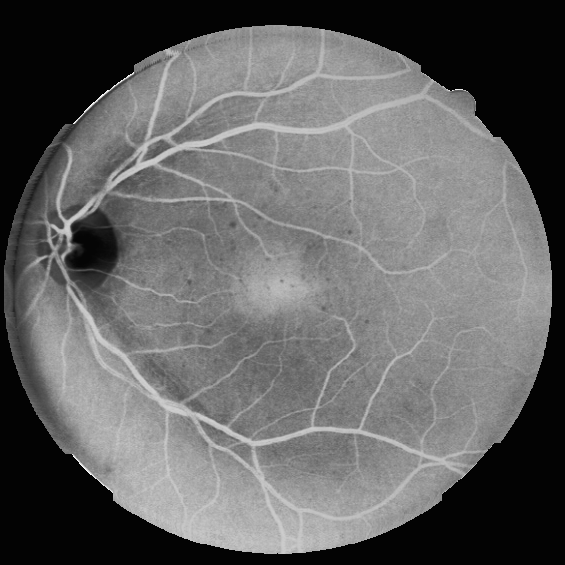

Elapsed time is 0.04782414436340332 seconds.


In [ ]:
tic()
gr_e = np.uint8(gr_e*255)
clahe = cv.createCLAHE(clipLimit=2 , tileGridSize=(2,2))
gr_eq = clahe.apply(gr_e)

cv2_imshow(gr_eq)
cv.waitKey(0)
cv.destroyAllWindows()

toc()

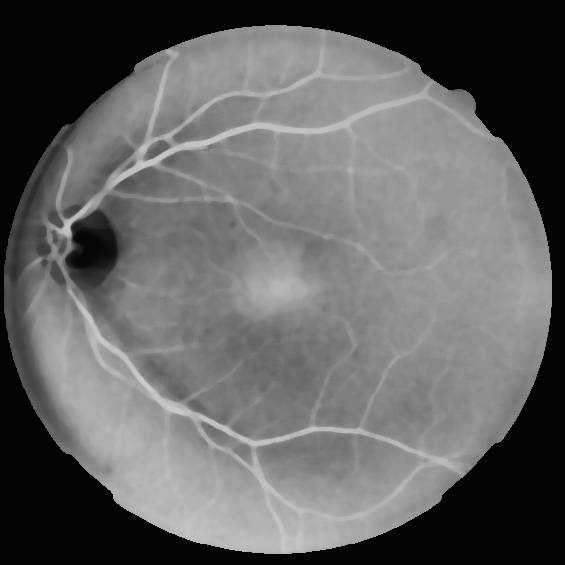

Elapsed time is 0.059628963470458984 seconds.


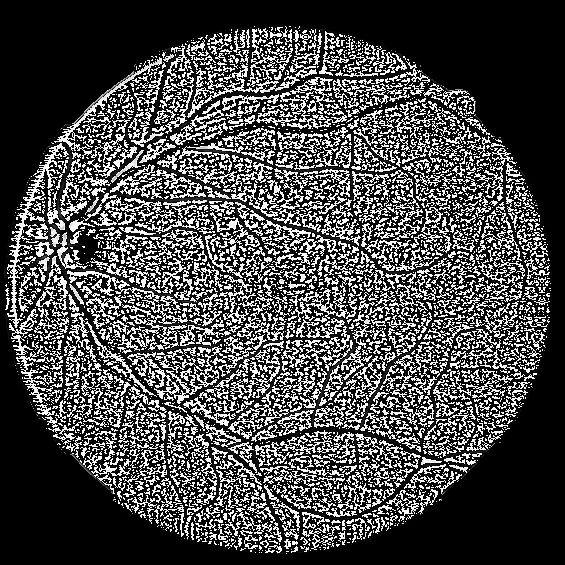

Elapsed time is 0.043906450271606445 seconds.


In [ ]:
tic()

gr_filt = cv.medianBlur(gr_eq,7)

cv2_imshow(gr_filt)
cv.waitKey(0)
cv.destroyAllWindows()
toc()
tic()

gr_uni = gr_eq - gr_filt

cv2_imshow(gr_uni)
cv.waitKey(0)
cv.destroyAllWindows()
toc()

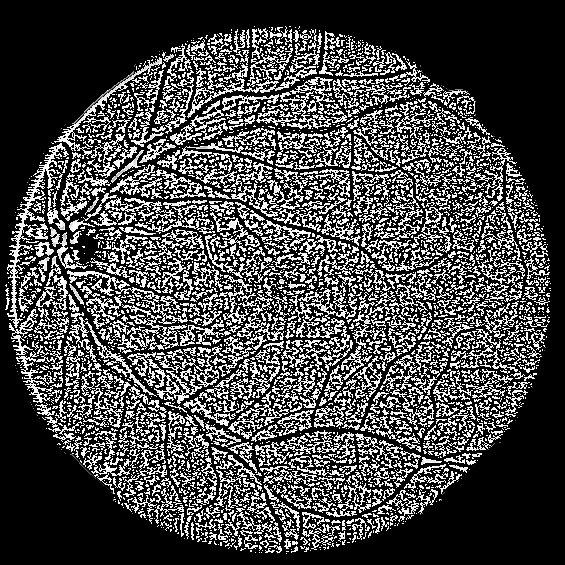

Elapsed time is 0.05018115043640137 seconds.


In [ ]:
tic()

gr_uni_nz = np.multiply(gr_uni,mask_tr)

gr_uni_nz[gr_uni_nz == 0] = np.nan
gr_mean = np.nanmean(gr_uni_nz)
gr_std = np.nanstd(gr_uni_nz)

std_mod = 100
mean_mod = 100

gr_res = (gr_std/std_mod)*(gr_uni-gr_mean)+mean_mod

cv2_imshow(gr_res)
cv.waitKey(0)
cv.destroyAllWindows()
toc()

In [ ]:
cv.imwrite('21_training_elong.tif',gr_res)

True